# Data Process

## UNSW_NB15

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [101]:
datafile = 'UNSW_NB15.csv'
savefile = 'UNSW_NB15_process.csv'

In [102]:
df = pd.read_csv(datafile, header=0)

In [103]:
def map_attack_cat(value):
    attack_list = ['DoS','Fuzzers','Analysis','Backdoor','Generic','Reconnaissance','Shellcode','Normal','Exploits']
    return attack_list.index(value) if value in attack_list else len(attack_list)

# Map categorical features
df['attack_cat'] = df['attack_cat'].apply(map_attack_cat)

In [104]:
sym_namelist = ['is_ftp_login','is_sm_ips_ports','attack_cat','label']
numeric_features = df.columns.difference(sym_namelist)

numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler()),  # You can add an imputer if needed
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ,
        ('cat', 'passthrough', sym_namelist)
    ])

processed_data = preprocessor.fit_transform(df)
processed_df = pd.DataFrame(processed_data)
processed_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.02439,0.043478,0.022222,0.0,0.0,0.02439,0.02439,0.022222,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0
1,0.0,0.02439,0.043478,0.022222,0.0,0.0,0.02439,0.02439,0.022222,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0
2,0.0,0.02439,0.043478,0.022222,0.0,0.0,0.02439,0.02439,0.022222,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0
3,0.0,0.02439,0.043478,0.022222,0.0,0.0,0.02439,0.02439,0.022222,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0
4,0.0,0.02439,0.043478,0.022222,0.0,0.0,0.02439,0.02439,0.022222,0.022222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137777,0.0,0.00000,0.000000,0.044444,0.0,0.0,0.00000,0.00000,0.044444,0.066667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
137778,0.0,0.00000,0.000000,0.044444,0.0,0.0,0.00000,0.00000,0.044444,0.066667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
137779,0.0,0.00000,0.000000,0.044444,0.0,0.0,0.00000,0.00000,0.044444,0.066667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
137780,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.00000,0.00000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0


In [105]:
labeltype,labelcnt = np.unique(processed_df[39],return_counts=True)

In [106]:
labeltype

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [107]:
labelcnt

array([14573,   315,   244,    24, 33434, 59236,    18, 11346, 18592],
      dtype=int64)

In [108]:
processed_df.to_csv(savefile, index=None)

## kddcup_99

In [95]:
datafile = 'kddcup99_csv.csv'
savefile = 'kdd_process.csv'

In [96]:
df = pd.read_csv(datafile, header=0)

In [97]:
def map_protocol(value):
    protocol_mapping = {'tcp': 0, 'udp': 1, 'icmp': 2}
    return protocol_mapping.get(value, 3)

def map_service(value):
    service_list = ['aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
                    'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest',
                    'hostnames',
                    'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell',
                    'ldap',
                    'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp',
                    'nntp',
                    'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje',
                    'shell',
                    'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
                    'urh_i', 'urp_i',
                    'uucp', 'uucp_path', 'vmnet', 'whois', 'X11', 'Z39_50']
    return service_list.index(value) if value in service_list else len(service_list)

def map_flag(value):
    flag_list = ['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH']
    return flag_list.index(value) if value in flag_list else value

def map_label(value):
    label_list = [
        ['normal'],
        ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop', 'apache2', 'mailbomb', 'processtable',
         'udpstorm'],
        ['ipsweep', 'nmap', 'portsweep', 'satan', 'mscan', 'saint'],
        ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'warezclient', 'warezmaster', 'named',
         'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock', 'xsnoop'],
        ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'httptunnel', 'ps', 'rootkit', 'sqlattack',
         'xterm']
    ]
    for i, label_group in enumerate(label_list):
        if value in label_group:
            return i
    return value

# Map categorical features
df['protocol_type'] = df['protocol_type'].apply(map_protocol)
df['service'] = df['service'].apply(map_service)
df['flag'] = df['flag'].apply(map_flag)
df['label'] = df['label'].apply(map_label)

In [98]:
# Preprocess data
column_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','lnum_compromised','lroot_shell','lsu_attempted','lnum_root','lnum_file_creations','lnum_shells','lnum_access_files','lnum_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','label']
sym_namelist = []
sym = [1, 2, 3, 6, 11, 13, 14, 20, 21, *range(31, 42)]
for i in sym:
    sym_namelist.append(column_names[i])
numeric_features = df.columns.difference(sym_namelist)

numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler()),  # You can add an imputer if needed
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ,
        ('cat', 'passthrough', sym_namelist)
    ])

processed_data = preprocessor.fit_transform(df)
processed_df = pd.DataFrame(processed_data)
processed_df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.015656,0.0,0.001057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,0.0
1,0.015656,0.0,0.000094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,0.0
2,0.015656,0.0,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0.0
3,0.011742,0.0,0.000259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.0,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,0.0
4,0.011742,0.0,0.000394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0.007828,0.0,0.000365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,0.0
494016,0.011742,0.0,0.000443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,0.0
494017,0.011742,0.0,0.000233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,0.0
494018,0.011742,0.0,0.000233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,0.0


In [99]:
processed_df.to_csv(savefile, index=None)

# bot_iot

In [5]:
data_bot_iot_test = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
data_bot_iot_train = pd.read_csv("UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
def map_pro(value):
    protol_list = ['arp', 'icmp', 'ipv6-icmp', 'tcp', 'udp']
    return protol_list.index(value) if value in protol_list else value
data_bot_iot_test["proto"] = data_bot_iot_test["proto"].apply(map_pro)
data_bot_iot_train["proto"] = data_bot_iot_train["proto"].apply(map_pro)
def map_ip_sa(value):
    s_ip_list = ['192.168.100.150',
 'fe80::2c6a:ff9b:7e14:166a',
 '192.168.100.55',
 'fe80::250:56ff:febe:89ee',
 'fe80::250:56ff:febe:bf1a',
 '192.168.100.4',
 'fe80::250:56ff:febe:c038',
 '192.168.100.27',
 'fe80::250:56ff:febe:254',
 '192.168.100.147',
 '192.168.100.7',
 'fe80::250:56ff:febe:26db',
 '192.168.100.149',
 '192.168.100.5',
 '192.168.100.46',
 'fe80::c0c0:aa20:45b9:bdd9',
 '192.168.100.1',
 '192.168.100.148',
 '192.168.100.6',
 'fe80::250:56ff:febe:e9d9',
 '192.168.100.3']
    return s_ip_list.index(value) if value in s_ip_list else value
data_bot_iot_test["saddr"] = data_bot_iot_test["saddr"].apply(map_ip_sa)
data_bot_iot_train["saddr"] = data_bot_iot_train["saddr"].apply(map_ip_sa)
def map_ip_da(value):
    d_ip_list = ['216.239.38.10',
 '205.251.199.148',
 '192.33.4.12',
 '192.168.100.55',
 '205.251.195.97',
 'ff02::2',
 '192.168.100.27',
 '205.251.195.185',
 '192.168.100.7',
 '192.168.100.149',
 '205.251.192.170',
 '205.251.196.160',
 '192.168.100.148',
 'ff02::1',
 '192.33.14.30',
 '205.251.196.32',
 '205.251.193.205',
 '192.168.100.3',
 '192.54.112.30',
 '216.239.36.10',
 '91.189.92.40',
 '199.19.57.1',
 '96.7.49.66',
 'ff02::fb',
 '192.168.100.147',
 '192.12.94.30',
 '192.168.100.1',
 '13.55.154.73',
 '156.154.100.3',
 '205.251.198.91',
 '192.55.83.30',
 '205.251.198.119',
 '192.168.217.2',
 '192.36.148.17',
 '205.251.197.206',
 '192.168.100.150',
 '205.251.194.167',
 '205.251.196.236',
 '216.239.34.10',
 '205.251.199.194',
 '192.168.100.255',
 '202.12.27.33',
 '192.168.100.4',
 '8.8.8.8',
 '192.48.79.30',
 '224.0.0.251',
 '205.251.194.102',
 '184.85.248.65',
 '52.201.147.106',
 '192.5.5.241',
 '192.168.100.5',
 '192.41.162.30',
 '192.42.93.30',
 '172.217.25.170',
 '52.11.124.117',
 '27.124.125.250',
 '205.251.193.2',
 '128.63.2.53',
 '224.0.0.252',
 '199.19.56.1',
 '52.35.35.13',
 '205.251.194.86',
 '199.7.91.13',
 '198.41.0.4',
 '192.26.92.30',
 '192.203.230.10',
 '192.31.80.30',
 '199.7.83.42',
 '192.58.128.30',
 '91.189.91.157',
 '255.255.255.255',
 '192.112.36.4',
 '205.251.194.201',
 '156.154.101.3',
 '35.165.2.252',
 '205.251.198.239',
 '205.251.199.61',
 '192.168.100.6',
 '205.251.194.154',
 '192.52.178.30',
 '205.251.194.84',
 '192.35.51.30',
 '205.251.195.59',
 '129.250.35.250']
    return d_ip_list.index(value) if value in d_ip_list else value
data_bot_iot_test["daddr"] = data_bot_iot_test["daddr"].apply(map_ip_da)
data_bot_iot_train["daddr"] = data_bot_iot_train["daddr"].apply(map_ip_da)
def hex_to_decimal(hex_value):
    # 如果是字符串以 '0x' 开头，则将其解释为16进制数并转换为10进制
    if isinstance(hex_value, str) and hex_value.startswith('0x'):
        return int(hex_value, 16)
    else:
        # 如果不是16进制字符串，则返回原值
        return hex_value

# 将转换函数应用到DataFrame的列
data_bot_iot_test['sport'] = data_bot_iot_test['sport'].apply(hex_to_decimal)
data_bot_iot_train['sport'] = data_bot_iot_train['sport'].apply(hex_to_decimal)
data_bot_iot_test['dport'] = data_bot_iot_test['dport'].apply(hex_to_decimal)
data_bot_iot_train['dport'] = data_bot_iot_train['dport'].apply(hex_to_decimal)
data_bot_iot_test["label"] = data_bot_iot_test.groupby(["category","subcategory"]).ngroup()
data_bot_iot_train["label"] = data_bot_iot_train.groupby(["category","subcategory"]).ngroup()

sym_namelist = ['proto','saddr','daddr','category','subcategory','label','attack']
numeric_features = data_bot_iot_test.columns.difference(sym_namelist)
sym_namelist = ['proto','saddr','daddr','attack','label']
numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler()),  # You can add an imputer if needed
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ,
        ('cat', 'passthrough', sym_namelist)
    ])

processed_data_test = preprocessor.fit_transform(data_bot_iot_test)
processed_df_test = pd.DataFrame(processed_data_test)
processed_df_test


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,1.000000,0.001236,0.000000,0.943888,0.894736,0.823303,0.215992,0.667756,0.740311,1.214133e-06,0.3,0.090831,4.0,0.0,17.0,1.0,5.0
1,1.000000,1.000000,0.001236,0.000004,0.888586,0.764018,0.690549,0.560560,0.545450,0.339783,1.204191e-06,0.0,0.181034,3.0,17.0,17.0,1.0,1.0
2,1.000000,0.727273,0.001236,0.000000,0.827691,0.548238,0.000000,0.762067,0.637014,0.436859,1.221861e-06,0.3,0.773624,4.0,12.0,17.0,1.0,2.0
3,1.000000,0.555556,0.001236,0.000000,0.845940,0.727937,0.656848,0.577349,0.780341,0.643051,1.030962e-06,0.0,0.171742,3.0,17.0,17.0,1.0,1.0
4,1.000000,1.000000,0.001236,0.000000,0.950726,0.238550,0.000000,0.082782,0.152766,0.025116,4.075260e-07,0.2,0.824422,3.0,12.0,50.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,0.383838,0.383838,0.001236,0.000000,0.808687,0.606299,0.000000,0.428486,0.641319,0.265701,6.738090e-07,0.3,0.698482,4.0,17.0,77.0,1.0,5.0
733701,1.000000,0.646465,0.001236,0.000000,0.938327,0.783938,0.602809,0.759736,0.604403,0.014236,2.625363e-06,0.3,0.278208,4.0,9.0,17.0,1.0,2.0
733702,1.000000,0.525253,0.001236,0.000005,0.760429,0.494660,0.000000,0.614795,0.304488,0.732132,1.418319e-06,0.0,0.698767,3.0,12.0,17.0,1.0,1.0
733703,1.000000,1.000000,0.001236,0.000000,0.000000,0.000000,0.000000,0.160541,0.240890,0.382950,2.113830e-07,0.2,0.000000,3.0,9.0,8.0,1.0,4.0


In [10]:
processed_df_test.to_csv("UNSW_2018_IoT_Test_Process.csv", index=None)

In [7]:
processed_data_train = preprocessor.fit_transform(data_bot_iot_train)
processed_df_train = pd.DataFrame(processed_data_train)
processed_df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.000000,1.000000,0.001236,0.000000e+00,0.806324,0.539459,0.000000,0.856683,0.960997,0.099976,4.945490e-07,0.3,0.761131,4.0,0.0,17.0,1.0,2.0
1,1.000000,0.373737,0.001236,0.000000e+00,0.802585,0.789847,0.774411,0.663009,0.979074,0.084427,2.564930e-07,0.2,0.031242,3.0,0.0,17.0,1.0,1.0
2,1.000000,1.000000,0.001236,0.000000e+00,0.721841,0.670716,0.597152,0.538722,0.239960,0.414520,2.948800e-07,0.2,0.107606,3.0,9.0,17.0,1.0,1.0
3,0.626263,0.626263,0.001236,0.000000e+00,0.988461,0.646911,0.000000,0.338217,0.378197,0.743408,4.614350e-07,0.3,0.730219,4.0,0.0,17.0,1.0,5.0
4,1.000000,1.000000,0.001236,0.000000e+00,0.998891,0.799542,0.598336,0.888094,0.400679,0.342743,1.002999e-06,0.3,0.329394,4.0,9.0,17.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1.000000,1.000000,0.001236,0.000000e+00,0.824810,0.823487,0.819703,0.308790,0.966283,0.855179,2.434730e-07,0.3,0.006806,4.0,12.0,50.0,1.0,5.0
2934813,1.000000,1.000000,0.001236,0.000000e+00,0.818107,0.545683,0.000000,0.922612,0.883612,0.328781,4.908000e-07,0.3,0.769924,4.0,0.0,17.0,1.0,2.0
2934814,1.000000,1.000000,0.001236,0.000000e+00,0.866523,0.423688,0.000000,0.211500,0.604916,0.471466,2.074440e-07,0.3,0.845987,4.0,12.0,50.0,1.0,5.0
2934815,1.000000,1.000000,0.001236,0.000000e+00,0.000000,0.000000,0.000000,0.120889,0.685916,0.563126,1.621300e-07,0.2,0.000000,3.0,9.0,8.0,1.0,4.0


In [11]:
processed_df_train.to_csv("UNSW_2018_IoT_Train_Process.csv", index=None)

# not_iot

In [7]:
data_not_iot = pd.read_csv("train_test_network.csv")
def map_pro(value):
    protol_list = ['tcp','udp','icmp']
    return protol_list.index(value) if value in protol_list else len(protol_list)
data_not_iot["proto"] = data_not_iot["proto"].apply(map_pro)

def map_service(value):
    service_list = ['-','smb;gssapi','dce_rpc','smb','dns','ssl','http','ftp','gssapi']
    return service_list.index(value) if value in service_list else len(service_list)
data_not_iot["service"] = data_not_iot["service"].apply(map_service)

def map_conn_state(value):
    conn_state_list = ['OTH','REJ','S1','RSTR','SF','RSTO','SH','S3','S0','SHR','S2','RSTOS0','RSTRH']
    return conn_state_list.index(value) if value in conn_state_list else len(conn_state_list)
data_not_iot["conn_state"] = data_not_iot["conn_state"].apply(map_conn_state)

def map_type(value):
    type_list = ['backdoor','ddos','dos','injection','mitm','normal','password','ransomware','scanning','xss']
    return type_list.index(value) if value in type_list else len(type_list)
data_not_iot["type"] = data_not_iot["type"].apply(map_type)

def map_dns(value):
    dns_list = ['-','T','F']
    return dns_list.index(value) if value in dns_list else len(dns_list)
data_not_iot["dns_AA"] = data_not_iot["dns_AA"].apply(map_dns)
data_not_iot["dns_RD"] = data_not_iot["dns_RD"].apply(map_dns)
data_not_iot["dns_RA"] = data_not_iot["dns_RA"].apply(map_dns)
data_not_iot["dns_rejected"] = data_not_iot["dns_rejected"].apply(map_dns)
data_not_iot["ssl_resumed"] = data_not_iot["ssl_resumed"].apply(map_dns)
data_not_iot["ssl_established"] = data_not_iot["ssl_established"].apply(map_dns)


def map_ssl_version(value):
    ssl_version_list = ['-' 'TLSv10' 'TLSv12' 'TLSv13']
    return ssl_version_list.index(value) if value in ssl_version_list else len(ssl_version_list)
data_not_iot["ssl_version"] = data_not_iot["ssl_version"].apply(map_ssl_version)

def map_ssl_cipher(value):
    ssl_cipher_list = ['-','TLS_ECDHE_RSA_WITH_AES_256_CBC_SHA','TLS_ECDHE_RSA_WITH_AES_128_GCM_SHA256','TLS_AES_128_GCM_SHA256','TLS_ECDHE_ECDSA_WITH_AES_128_GCM_SHA256','TLS_ECDHE_RSA_WITH_AES_256_GCM_SHA384']
    return ssl_cipher_list.index(value) if value in ssl_cipher_list else len(ssl_cipher_list)
data_not_iot["ssl_cipher"] = data_not_iot["ssl_cipher"].apply(map_ssl_cipher)

def map_ssl_subject(value):
    ssl_subject_list = ['-','CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE','CN=settings-win.data.microsoft.com;OU=WSE;O=Microsoft;L=Redmond;ST=WA;C=US','CN=*.wns.windows.com','CN=sls.update.microsoft.com;OU=DSP;O=Microsoft;L=Redmond;ST=WA;C=US','CN=*.events.data.microsoft.com;OU=Microsoft;O=Microsoft Corporation;L=Redmond;ST=WA;C=US']
    return ssl_subject_list.index(value) if value in ssl_subject_list else len(ssl_subject_list)
data_not_iot["ssl_subject"] = data_not_iot["ssl_subject"].apply(map_ssl_subject)

def map_ssl_issuer(value):
    ssl_issuer_list = ['-','CN=Mr Shepherd;OU=Security Shepherd Project;O=OWASP;L=Dublin;ST=Ireland;C=IE','CN=Microsoft Secure Server CA 2011;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US','CN=Microsoft IT TLS CA 5;OU=Microsoft IT;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US','CN=Microsoft Update Secure Server CA 2.1;O=Microsoft Corporation;L=Redmond;ST=Washington;C=US']
    return ssl_issuer_list.index(value) if value in ssl_issuer_list else len(ssl_issuer_list)
data_not_iot["ssl_issuer"] = data_not_iot["ssl_issuer"].apply(map_ssl_issuer)

def map_http_trans_depth(value):
    http_trans_depth_list = ['-','1','2','10','3','4','5','6','7','8','9']
    return http_trans_depth_list.index(value) if value in http_trans_depth_list else len(http_trans_depth_list)
data_not_iot["http_trans_depth"] = data_not_iot["http_trans_depth"].apply(map_http_trans_depth)

def map_http_method(value):
    http_method_list = ['-','GET','POST','HEAD']
    return http_method_list.index(value) if value in http_method_list else len(http_method_list)
data_not_iot["http_method"] = data_not_iot["http_method"].apply(map_http_method)

def map_http_status_code(value):
    http_status_code_list = [0,404,200,206,302,304,101,403]
    return http_status_code_list.index(value) if value in http_status_code_list else len(http_status_code_list)
data_not_iot["http_status_code"] = data_not_iot["http_status_code"].apply(map_http_status_code)

def map_dns_qclass(value):
    qclass_list = [0,1,32769]
    return qclass_list.index(value) if value in qclass_list else len(qclass_list)
data_not_iot["dns_qclass"] = data_not_iot["dns_qclass"].apply(map_dns_qclass)

def map_dns_qtype(value):
    qtype_list = [0,1,28,6,12,32,255,43,2,48,33,16]
    return qtype_list.index(value) if value in qtype_list else len(qtype_list)
data_not_iot["dns_qtype"] = data_not_iot["dns_qtype"].apply(map_dns_qtype)

def map_dns_rcode(value):
    dns_rcode_list = [0,3,2,5]
    return dns_rcode_list.index(value) if value in dns_rcode_list else len(dns_rcode_list)
data_not_iot["dns_rcode"] = data_not_iot["dns_rcode"].apply(map_dns_rcode)


numeric_features = ['src_port','dst_port','duration','src_bytes','dst_bytes','missed_bytes','src_pkts','src_ip_bytes','dst_pkts','dst_ip_bytes','http_request_body_len','http_response_body_len']

sym_namelist = ['proto','service','conn_state','dns_AA','dns_RD','dns_RA','dns_rejected','ssl_resumed','ssl_established','ssl_version','ssl_cipher','ssl_subject','ssl_issuer','http_trans_depth','http_method','http_status_code','dns_qclass','dns_qtype','dns_rcode','label','type']

numeric_transformer = Pipeline(steps=[
    ('imputer', StandardScaler()),  # You can add an imputer if needed
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ,
        ('cat', 'passthrough', sym_namelist)
    ])

processed_data_not = preprocessor.fit_transform(data_not_iot)
processed_df_not = pd.DataFrame(processed_data_not)
processed_df_not


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.067804,0.751188,3.105016e-03,2.610429e-05,6.622629e-07,0.0,0.004386,0.016568,0.000254,4.435415e-05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.750515,0.123421,1.090712e-09,0.000000e+00,0.000000e+00,0.0,0.000041,0.000008,0.000008,4.629870e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.750515,0.123421,1.582601e-09,0.000000e+00,0.000000e+00,0.0,0.000041,0.000008,0.000008,4.629870e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.750515,0.123421,1.208337e-09,0.000000e+00,0.000000e+00,0.0,0.000041,0.000007,0.000008,4.629870e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.750515,0.123421,1.390123e-09,0.000000e+00,0.000000e+00,0.0,0.000041,0.000008,0.000008,4.629870e-07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211038,0.736872,0.001222,6.990885e-04,6.849394e-07,8.227186e-08,0.0,0.000203,0.000448,0.000041,6.829058e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
211039,0.736902,0.001222,7.026572e-04,5.106847e-07,8.227186e-08,0.0,0.000244,0.000354,0.000041,6.829058e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
211040,0.736963,0.001222,7.032578e-04,1.008005e-06,8.227186e-08,0.0,0.000284,0.000658,0.000049,7.430941e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0
211041,0.736994,0.001222,7.031234e-04,6.170880e-07,8.227186e-08,0.0,0.000244,0.000417,0.000041,6.829058e-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0


In [8]:
processed_df_not.to_csv("train_test_not_iot_Process.csv", index=None)

# Create Dataset

## UNSW_NB15

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data_un = pd.read_csv('UNSW_NB15_process_data2.csv')

In [5]:
x_un = data_un.iloc[:, :39]  # feature
y_un = data_un.iloc[:, 39]   # label

In [6]:
x_un_train, x_un_test, y_un_train, y_un_test = train_test_split(x_un, y_un, test_size=0.2)

In [24]:
y_un_test

90368     8.0
84651     1.0
7421      5.0
121305    4.0
131427    7.0
         ... 
14228     5.0
133527    7.0
93491     4.0
88069     8.0
79333     8.0
Name: 39, Length: 27557, dtype: float64

## kddcup_99

In [4]:
data_kdd = pd.read_csv('kdd_process_data.csv')

In [5]:
x_kdd = data_kdd.iloc[:, :41]  # feature
y_kdd = data_kdd.iloc[:, 41]   # label

In [6]:
x_kdd_train, x_kdd_test, y_kdd_train, y_kdd_test = train_test_split(x_kdd, y_kdd, test_size=0.4, random_state=42)

## bot_iot

In [7]:
data_bot_iot_te = pd.read_csv("UNSW_2018_IoT_Test_Process.csv")
data_bot_iot_tr = pd.read_csv("UNSW_2018_IoT_Train_Process.csv")
x_bot_train = data_bot_iot_tr.iloc[:,:17]
y_bot_train = data_bot_iot_tr.iloc[:,17]
x_bot_test = data_bot_iot_te.iloc[:,:17]
y_bot_test = data_bot_iot_te.iloc[:,17]

# not_iot

In [8]:
data_not_iot = pd.read_csv('train_test_not_iot_Process.csv')
x_not_iot = data_not_iot.iloc[:, :32]  # feature
y_not_iot = data_not_iot.iloc[:, 32]  # label
x_not_iot_train, x_not_iot_test, y_not_iot_train, y_not_iot_test = train_test_split(x_not_iot, y_not_iot, test_size=0.4, random_state=42)

# Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn import metrics

import psutil

In [38]:
# 记录开始时的CPU使用情况

start_time = time.time()
# create model
dt_classifier_UNSW = DecisionTreeClassifier(max_depth=12)
#train model
dt_classifier_UNSW.fit(x_un_train, y_un_train)

#predict
y_un_dt_pred = dt_classifier_UNSW.predict(x_un_test)
accuracy_dt_UN = accuracy_score(y_un_test, y_un_dt_pred)
# 记录结束后的CPU使用情况
end_time = time.time()


# 计算代码执行时间
elapsed_time = end_time - start_time

# 打印结果
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Decision Tree Model Accuracy on UNSW_NB15: ", accuracy_dt_UN)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_un_test, y_un_dt_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_un_test, y_un_dt_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_un_test, y_un_dt_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_un_test, y_un_dt_pred)*100)

Elapsed Time: 0.15 seconds
Decision Tree Model Accuracy on UNSW_NB15:  0.8897194905105781
Mean bsolute Error:  0.8651522299234314
Mean Squared Error:  6.849620786007185
Root Mean Squared Error:  2.617178019548381
R2 Score:  -43.696642029424005


In [118]:
import numpy as np
y_un_testn,y_un_testcnt = np.unique(y_un_test,return_counts=True)
y_un_testn

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [119]:
y_un_testcnt

array([ 2998,    73,    49,     6,  6599, 11797,     5,  2238,  3792],
      dtype=int64)

In [34]:
import numpy as np
y_un_dt_predn,y_un_dt_predcnt = np.unique(y_un_dt_pred,return_counts=True)
y_un_dt_predn

array([0., 1., 4., 5., 6., 8., 9.])

## Confusion Matrix

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

0.0
0
1.0
1
2.0
2
3.0
3
4.0
4
5.0
5
6.0
6
7.0
7
8.0
8


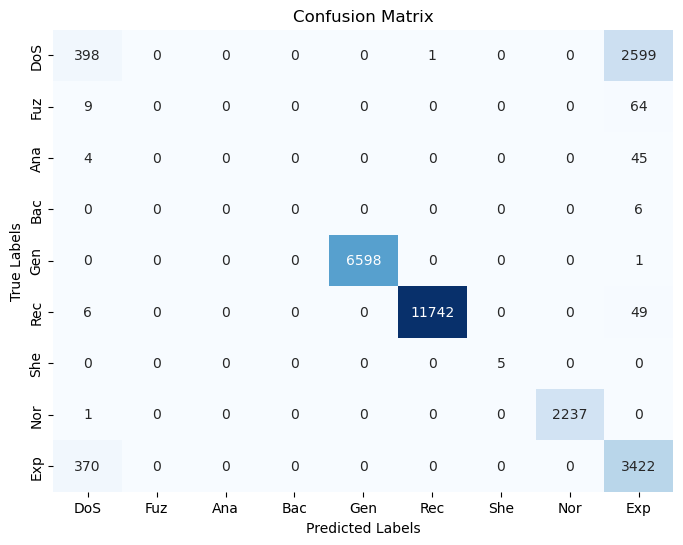

In [121]:
conf_matrix = confusion_matrix(y_un_test, y_un_dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['DoS','Fuz','Ana','Bac','Gen','Rec','She','Nor','Exp']
ylabel = np.union1d(np.array(y_un_test), np.array(y_un_dt_pred))
labelnames = []
for i in ylabel:
    print(i)
    print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

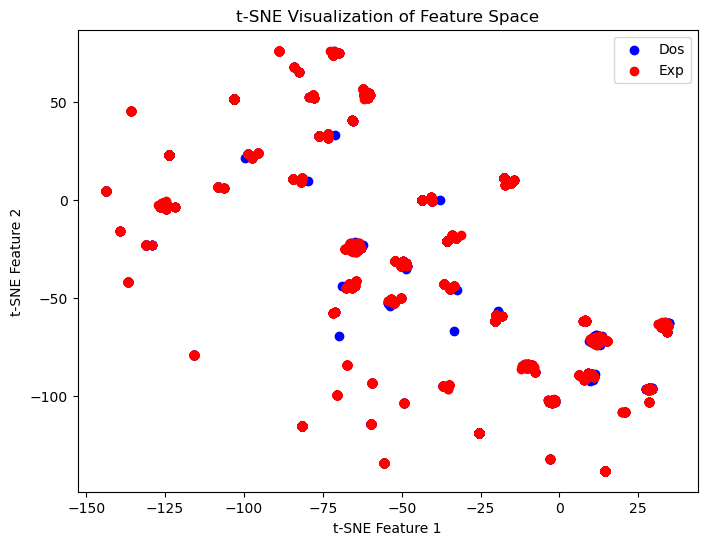

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 
tsne = TSNE(n_components=2, random_state=42)

# 
X_tsne = tsne.fit_transform(x_un_test)

# 
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[y_un_test == 0.0, 0], X_tsne[y_un_test == 0.0, 1], color='b', label='Dos')
plt.scatter(X_tsne[y_un_test == 8.0, 0], X_tsne[y_un_test == 8.0, 1], color='r', label='Exp')
plt.title('t-SNE Visualization of Feature Space')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


## Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
from matplotlib.pyplot import MultipleLocator

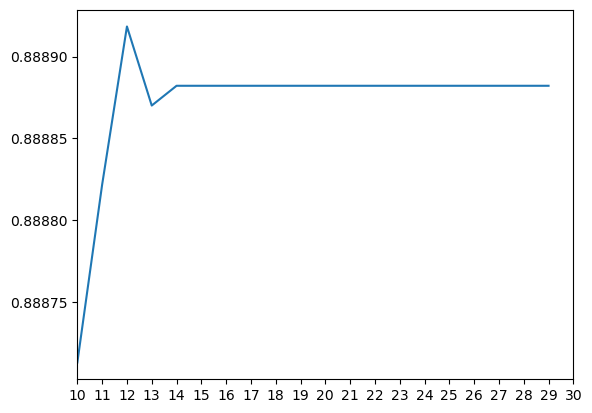

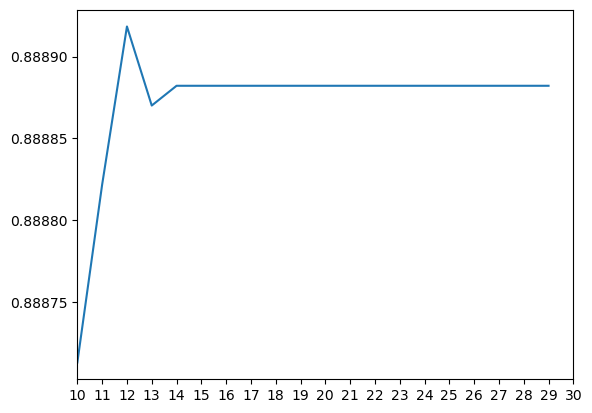

In [93]:

max_depth_list = range(10,30)
acc_s = []
for d in max_depth_list:
    dt_classifier_UNSW = DecisionTreeClassifier(random_state=51,max_depth=d)
    cv_scores = cross_val_score(dt_classifier_UNSW,x_un_train,y_un_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(10,30)
x = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(max_depth_list,acc_s)
plt.show()

Therefore, I choose max_depth = 12

## kddcup99

In [41]:
# create model
start_time = time.time()
dt_classifier_kdd = DecisionTreeClassifier(random_state=42)
#train model
dt_classifier_kdd.fit(x_kdd_train, y_kdd_train)
#predict
y_kdd_dt_pred = dt_classifier_kdd.predict(x_kdd_test)
accuracy_dt_kdd = accuracy_score(y_kdd_test, y_kdd_dt_pred)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Decision Tree Model Accuracy on kddcup99：", accuracy_dt_kdd)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_kdd_test, y_kdd_dt_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_kdd_test, y_kdd_dt_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_kdd_test, y_kdd_dt_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_kdd_test, y_kdd_dt_pred)*100)

Elapsed Time: 2.11 seconds
Decision Tree Model Accuracy on kddcup99： 0.9993674345168212
Mean bsolute Error:  0.0014877940164365814
Mean Squared Error:  0.0040585401400753006
Root Mean Squared Error:  0.06370667264953728
R2 Score:  97.76231462003689


## Confusion Matrix

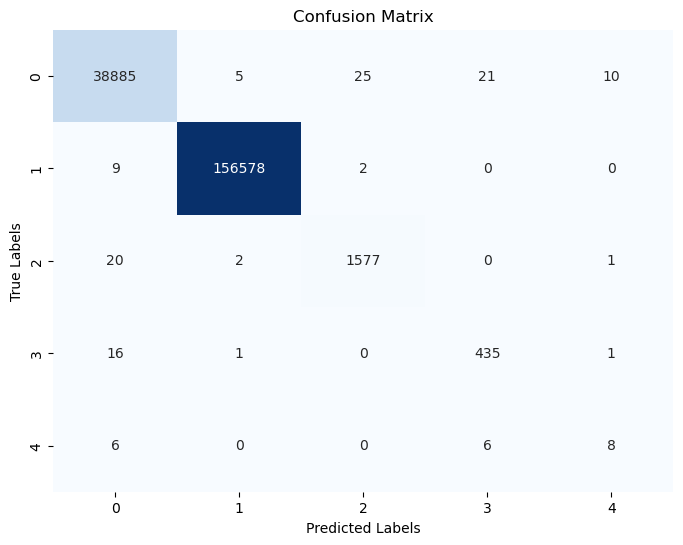

In [107]:
conf_matrix = confusion_matrix(y_kdd_test, y_kdd_dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Cross Validation

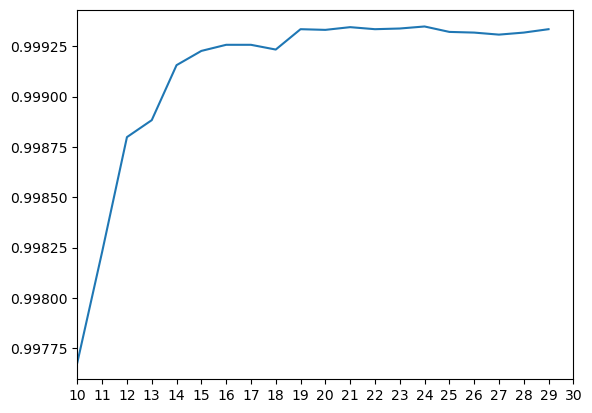

[0.9976789061478817, 0.9982288163624361, 0.9987989690935759, 0.9988833111010971, 0.9991565788435277, 0.9992274263142289, 0.9992577896053856, 0.9992577893777517, 0.9992341738387269, 0.9993353842591339, 0.9993320103830682, 0.9993455053182473, 0.9993353842022256, 0.9993387579075662, 0.9993488791374048, 0.9993218895515886, 0.9993185158462483, 0.9993083949009518, 0.9993185159031566, 0.9993353845436763]


In [114]:
max_depth_list = range(10,30)
acc_s = []
for d in max_depth_list:
    dt_classifier_kdd = DecisionTreeClassifier(random_state=51,max_depth=d)
    cv_scores = cross_val_score(dt_classifier_kdd,x_kdd_train,y_kdd_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(10,30)
x = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(max_depth_list,acc_s)
plt.show()
print(acc_s)

Therefore, I choose max_depth = 19

## bot_iot

In [42]:

# create model
start_time = time.time()
dt_classifier_bot_iot = DecisionTreeClassifier(random_state=42)
#train model
dt_classifier_bot_iot.fit(x_bot_train, y_bot_train)
#predict
y_bot_dt_pred = dt_classifier_bot_iot.predict(x_bot_test)
accuracy_dt_bot = accuracy_score(y_bot_test, y_bot_dt_pred)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Decision Tree Model Accuracy on bot_iot：", accuracy_dt_bot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_bot_test, y_bot_dt_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_bot_test, y_bot_dt_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_bot_test, y_bot_dt_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_bot_test, y_bot_dt_pred)*100)

Elapsed Time: 12.05 seconds
Decision Tree Model Accuracy on bot_iot： 0.9999495710128731
Mean bsolute Error:  6.678433430329628e-05
Mean Squared Error:  0.0001240280494204074
Root Mean Squared Error:  0.011136788110600263
R2 Score:  99.996115386355


# Confusion Matrix

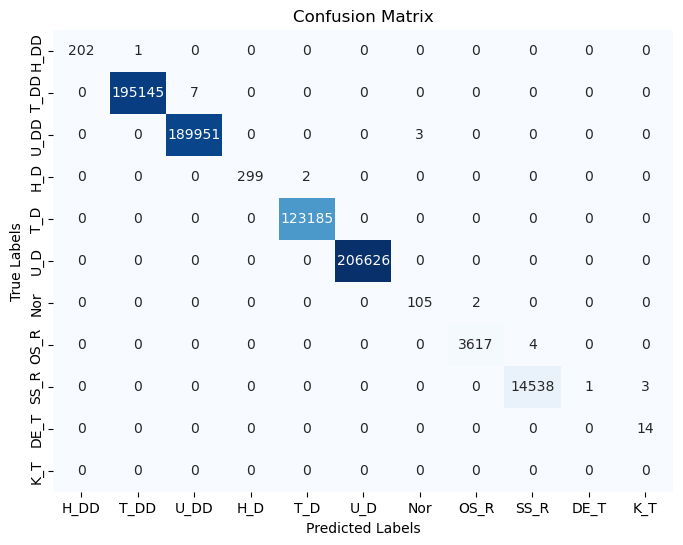

In [11]:
conf_matrix = confusion_matrix(y_bot_test, y_bot_dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['H_DD','T_DD','U_DD','H_D','T_D','U_D','Nor','OS_R','SS_R','DE_T','K_T']
ylabel = np.union1d(np.array(y_bot_test), np.array(y_bot_dt_pred))
labelnames = []
for i in ylabel:
#     print(i)
#     print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

## Cross Validation

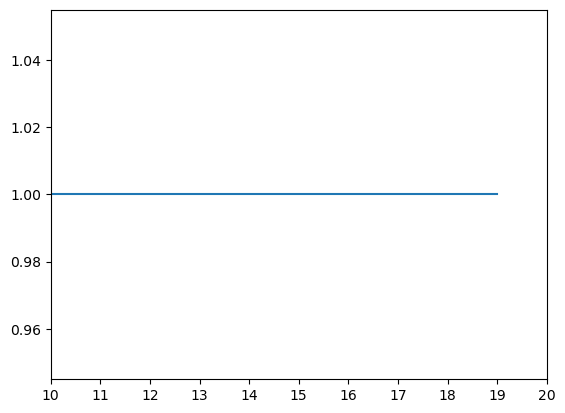

[0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624, 0.9999955704221624]


In [19]:
max_depth_list = range(10,20)
acc_s = []
for d in max_depth_list:
    dt_classifier_bot = DecisionTreeClassifier(random_state=51,max_depth=d)
    cv_scores = cross_val_score(dt_classifier_bot,x_bot_train,y_bot_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(10,20)
x = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(max_depth_list,acc_s)
plt.show()
print(acc_s)

# not_iot

In [43]:
import time
import psutil

# 
start_cpu_percent = psutil.cpu_percent()
start_time = time.time()
# create model
dt_classifier_not_iot = DecisionTreeClassifier(random_state=42)
#train model
dt_classifier_not_iot.fit(x_not_iot_train, y_not_iot_train)
#predict
y_not_dt_pred = dt_classifier_not_iot.predict(x_not_iot_test)
accuracy_dt_not = accuracy_score(y_not_iot_test, y_not_dt_pred)
# 
end_time = time.time()

# 
elapsed_time = end_time - start_time

# 
# idle_time_percent = 100 - cpu_usage_percent
# idle_time = elapsed_time * (idle_time_percent / 100)

# 打印结果
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Decision Tree Model Accuracy on not_iot：", accuracy_dt_not)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_not_iot_test, y_not_dt_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_not_iot_test, y_not_dt_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_not_iot_test, y_not_dt_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_not_iot_test, y_not_dt_pred)*100)

Elapsed Time: 0.56 seconds
Decision Tree Model Accuracy on not_iot： 0.9854533393352128
Mean bsolute Error:  0.06562581439977257
Mean Squared Error:  0.37150844606600486
Root Mean Squared Error:  0.6095149268607003
R2 Score:  95.23653404931838


# Confusion Matrix

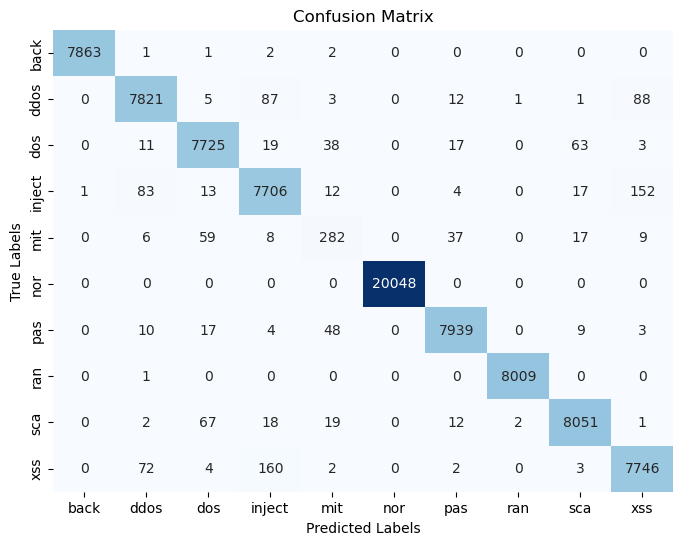

In [15]:
conf_matrix = confusion_matrix(y_not_iot_test, y_not_dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['back','ddos','dos','inject','mit','nor','pas','ran','sca','xss']
ylabel = np.union1d(np.array(y_not_iot_test), np.array(y_not_dt_pred))
labelnames = []
for i in ylabel:
#     print(i)
#     print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

## Cross Validation

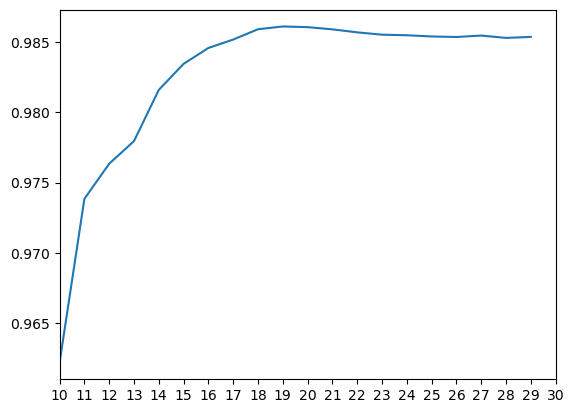

[0.9621875616979269, 0.9738440276406714, 0.9763474827245805, 0.9779585389930899, 0.9816071076011846, 0.9834629812438301, 0.9845923000987167, 0.9851924975320829, 0.9859269496544917, 0.9861243830207306, 0.9860769990128333, 0.9859190523198421, 0.985705824284304, 0.9855399802566633, 0.9855004935834156, 0.9854136229022705, 0.9853741362290227, 0.985476801579467, 0.9853109575518264, 0.9853820335636723]


In [23]:
max_depth_list = range(10,30)
acc_s = []
for d in max_depth_list:
    dt_classifier_not = DecisionTreeClassifier(random_state=51,max_depth=d)
    cv_scores = cross_val_score(dt_classifier_not,x_not_iot_train,y_not_iot_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(10,30)
x = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(max_depth_list,acc_s)
plt.show()
print(acc_s)

# Random Forest

## UNSW_NB15

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
import time

start_time = time.time()
# create model
rf_classifier_un = RandomForestClassifier(n_estimators=100, random_state=42)
#train model
rf_classifier_un.fit(x_un_train, y_un_train)
#predict
y_un_rf_pred = rf_classifier_un.predict(x_un_test)
accuracy_rf_UN = accuracy_score(y_un_test, y_un_rf_pred)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Random Forest Model Accuracy on UNSW_NB15：", accuracy_rf_UN)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_un_test, y_un_rf_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_un_test, y_un_rf_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_un_test, y_un_rf_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_un_test, y_un_rf_pred)*100)

Elapsed Time: 4.96 seconds
Random Forest Model Accuracy on UNSW_NB15： 0.8889937221032769
Mean bsolute Error:  0.8717930108502376
Mean Squared Error:  6.908008854374569
Root Mean Squared Error:  2.6283091245845815
R2 Score:  -43.4012387437287


## Confusion Matrix

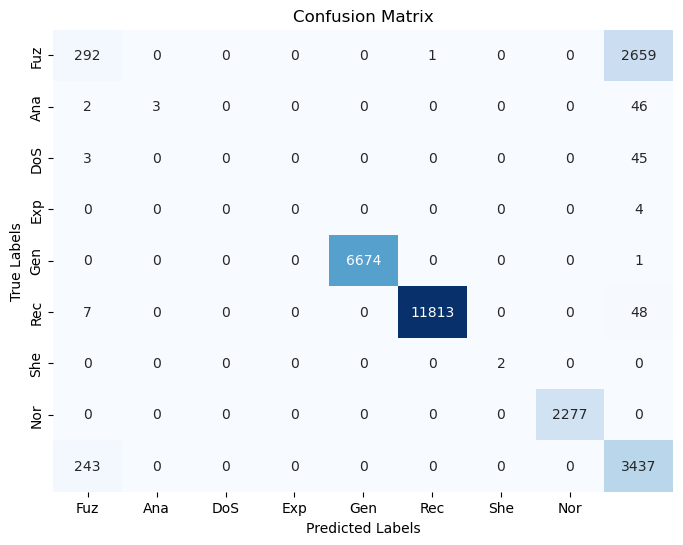

In [14]:
conf_matrix = confusion_matrix(y_un_test, y_un_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
labelnames = ['Fuz','Ana','DoS','Exp','Gen','Rec','She','Nor']
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

## Cross Validation

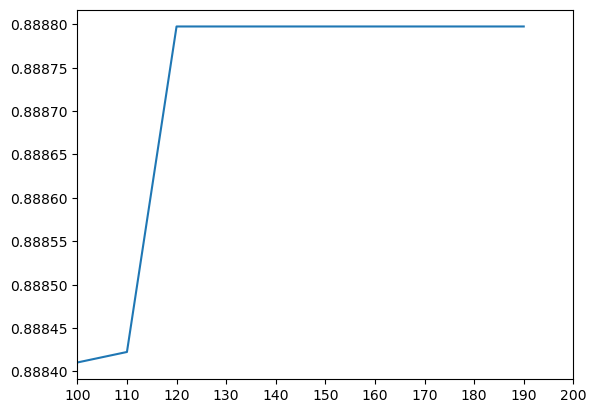

In [123]:
num_tree_list = range(100,200,10)
acc_s = []
for n in num_tree_list:
    rt_classifier_UNSW = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(rt_classifier_UNSW,x_un_train,y_un_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(100,200)
x = MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(num_tree_list,acc_s)
plt.show()

Therefore, I choose number of tree = 120

## kddcup99

In [46]:
start_time = time.time()
# create model
rf_classifier_kdd = RandomForestClassifier(n_estimators=100, random_state=42)
#train model
rf_classifier_kdd.fit(x_kdd_train, y_kdd_train)
#predict
y_kdd_rf_pred = rf_classifier_kdd.predict(x_kdd_test)
accuracy_rt_kdd = accuracy_score(y_kdd_test, y_kdd_rf_pred)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Random Forest Model Accuracy on kddcup99：", accuracy_rt_kdd)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_kdd_test, y_kdd_rf_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_kdd_test, y_kdd_rf_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_kdd_test, y_kdd_rf_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_kdd_test, y_kdd_rf_pred)*100)

Elapsed Time: 21.77 seconds
Random Forest Model Accuracy on kddcup99： 0.9997115501396705
Mean bsolute Error:  0.0007034128172948463
Mean Squared Error:  0.0019179385449981782
Root Mean Squared Error:  0.04379427525371528
R2 Score:  98.94264520960543


## Confusion Matrix

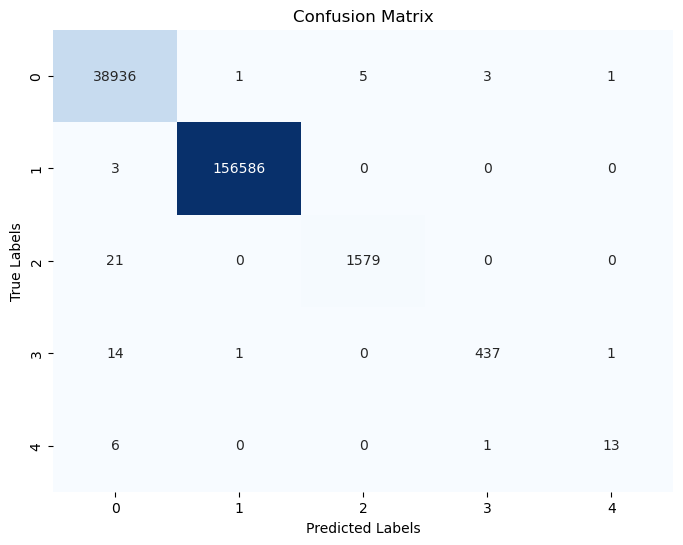

In [129]:
conf_matrix = confusion_matrix(y_kdd_test, y_kdd_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Cross Validation

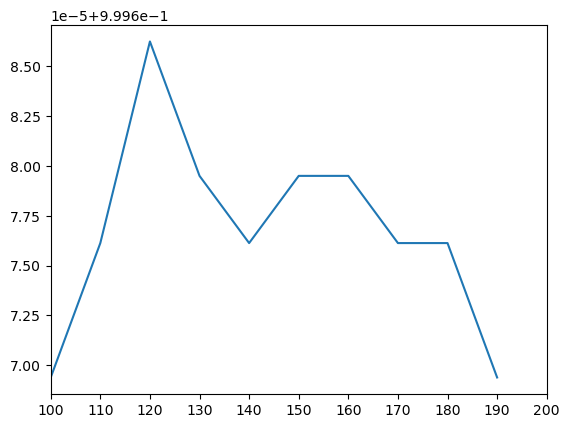

In [130]:
num_tree_list = range(100,200,10)
acc_s = []
for n in num_tree_list:
    rt_classifier_kdd = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(rt_classifier_kdd,x_kdd_train,y_kdd_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(100,200)
x = MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(num_tree_list,acc_s)
plt.show()

Therefore, I choose number of tree = 120

## bot_iot

In [47]:
start_time = time.time()
# create model
rf_classifier_bot = RandomForestClassifier(n_estimators=10, random_state=42)
#train model
rf_classifier_bot.fit(x_bot_train, y_bot_train)
#predict
y_bot_rf_pred = rf_classifier_bot.predict(x_bot_test)
accuracy_rt_bot = accuracy_score(y_bot_test, y_bot_rf_pred)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Random Forest Model Accuracy on bot_iot：", accuracy_rt_bot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_bot_test, y_bot_rf_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_bot_test, y_bot_rf_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_bot_test, y_bot_rf_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_bot_test, y_bot_rf_pred)*100)

Elapsed Time: 54.15 seconds
Random Forest Model Accuracy on bot_iot： 0.9999522969040691
Mean bsolute Error:  0.00016219052616514812
Mean Squared Error:  0.0009636025378047035
Root Mean Squared Error:  0.031041948034952693
R2 Score:  99.9698192242684


## Confusion Matrix

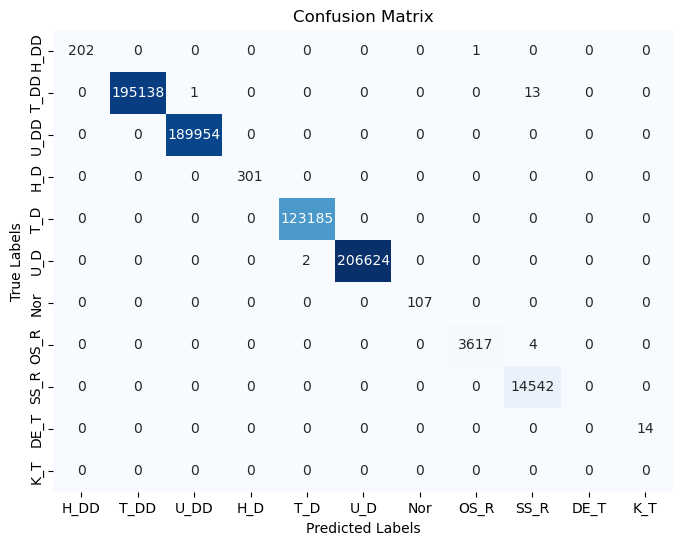

In [30]:
conf_matrix = confusion_matrix(y_bot_test, y_bot_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['H_DD','T_DD','U_DD','H_D','T_D','U_D','Nor','OS_R','SS_R','DE_T','K_T']
ylabel = np.union1d(np.array(y_bot_test), np.array(y_bot_rf_pred))
labelnames = []
for i in ylabel:
    # print(i)
    # print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

# not iot

In [50]:
start_time = time.time()
# create model
rf_classifier_not_iot = RandomForestClassifier(n_estimators=100, random_state=42)
#train model
rf_classifier_not_iot.fit(x_not_iot_train, y_not_iot_train)
#predict
y_not_iot_rf_pred = rf_classifier_not_iot.predict(x_not_iot_test)
accuracy_rt_not_iot = accuracy_score(y_not_iot_test, y_not_iot_rf_pred)
end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("Random Forest Model Accuracy on not iot：", accuracy_rt_not_iot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_not_iot_test, y_not_iot_rf_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_not_iot_test, y_not_iot_rf_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_not_iot_test, y_not_iot_rf_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_not_iot_test, y_not_iot_rf_pred)*100)

Elapsed Time: 10.72 seconds
Random Forest Model Accuracy on not iot： 0.9888649340188111
Mean bsolute Error:  0.05222819777772513
Mean Squared Error:  0.3001374114525338
Root Mean Squared Error:  0.5478479820648551
R2 Score:  96.16184999486134


# Confusion Matrix

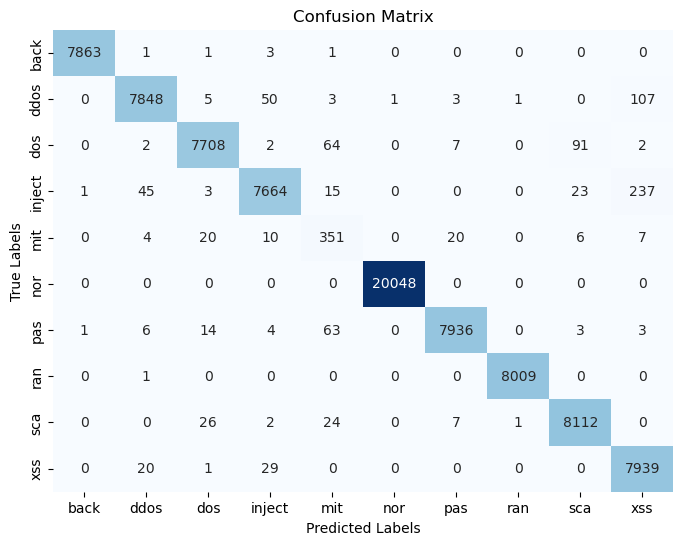

In [35]:
conf_matrix = confusion_matrix(y_not_iot_test, y_not_iot_rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['back','ddos','dos','inject','mit','nor','pas','ran','sca','xss']
ylabel = np.union1d(np.array(y_not_iot_test), np.array(y_not_iot_rf_pred))
labelnames = []
for i in ylabel:
#     print(i)
#     print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

# Cross Validation

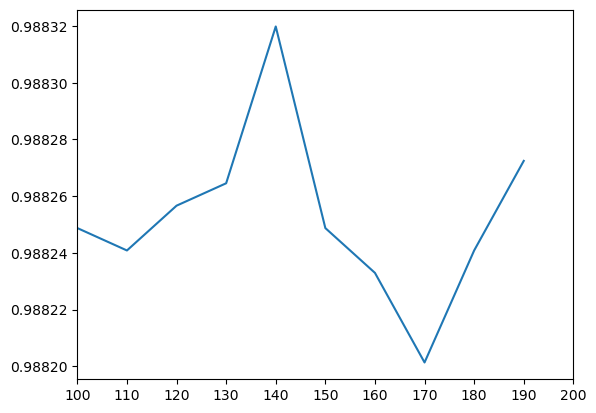

In [36]:
num_tree_list = range(100,200,10)
acc_s = []
for n in num_tree_list:
    rt_classifier_not = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_scores = cross_val_score(rt_classifier_not,x_not_iot_train,y_not_iot_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(100,200)
x = MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(num_tree_list,acc_s)
plt.show()

# KNN

## UNSW_NB15

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
#create model
start_time = time.time()
knn_classifier_un = KNeighborsClassifier()
#train model
knn_classifier_un.fit(x_un_train, y_un_train)
#predict
y_un_knn_pred = knn_classifier_un.predict(x_un_test)
accuracy_knn_UN = accuracy_score(y_un_test, y_un_knn_pred)
end_time = time.time()
elapsed_time = end_time - start_time

In [54]:
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("KNN Model Accuracy on UNSW_NB15：", accuracy_knn_UN)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_un_test, y_un_knn_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_un_test, y_un_knn_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_un_test, y_un_knn_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_un_test, y_un_knn_pred)*100)

Elapsed Time: 3.97 seconds
KNN Model Accuracy on UNSW_NB15： 0.8719018761113329
Mean bsolute Error:  0.9982944442428421
Mean Squared Error:  7.912254599557281
Root Mean Squared Error:  2.812873015185236
R2 Score:  -77.67950243132718


## Confusion Matrix

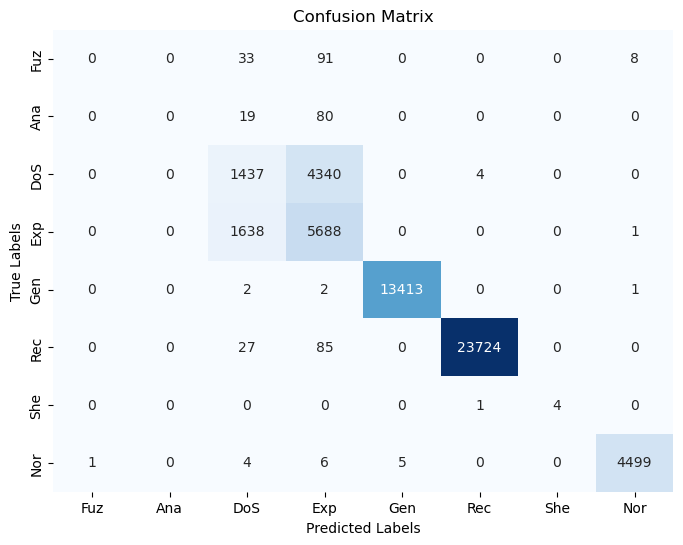

In [138]:
conf_matrix = confusion_matrix(y_un_test, y_un_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
labelnames = ['Fuz','Ana','DoS','Exp','Gen','Rec','She','Nor']
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

## Cross Validation

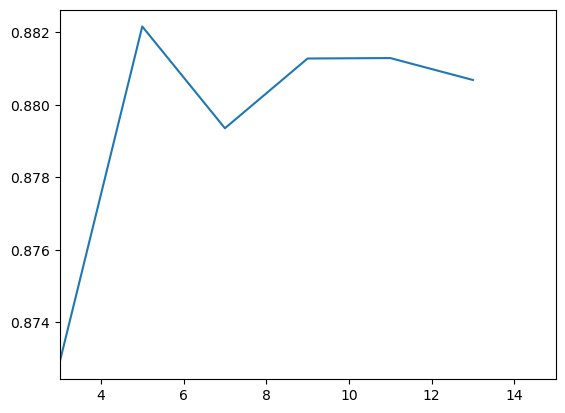

In [139]:
k_list = range(3,15,2)
acc_s = []
for n in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn_classifier,x_un_train,y_un_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(3,15)
x = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(k_list,acc_s)
plt.show()

Therefore, I choose K = 5

## kddcup99

In [57]:
start_time = time.time()
#create model
knn_classifier_kdd = KNeighborsClassifier()
#train model
knn_classifier_kdd.fit(x_kdd_train, y_kdd_train)
#predict
y_kdd_knn_pred = knn_classifier_kdd.predict(x_kdd_test)
accuracy_knn_kdd = accuracy_score(y_kdd_test, y_kdd_knn_pred)
end_time = time.time()
elapsed_time = end_time - start_time


In [58]:
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("KNN Model Accuracy on kddcup99：", accuracy_knn_kdd)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_kdd_test, y_kdd_knn_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_kdd_test, y_kdd_knn_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_kdd_test, y_kdd_knn_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_kdd_test, y_kdd_knn_pred)*100)

Elapsed Time: 43.64 seconds
KNN Model Accuracy on kddcup99： 0.9961489413384074
Mean bsolute Error:  0.005723452491801951
Mean Squared Error:  0.011117970932350917
Root Mean Squared Error:  0.10544178930742268
R2 Score:  93.87046430040579


## Confusion Matrix

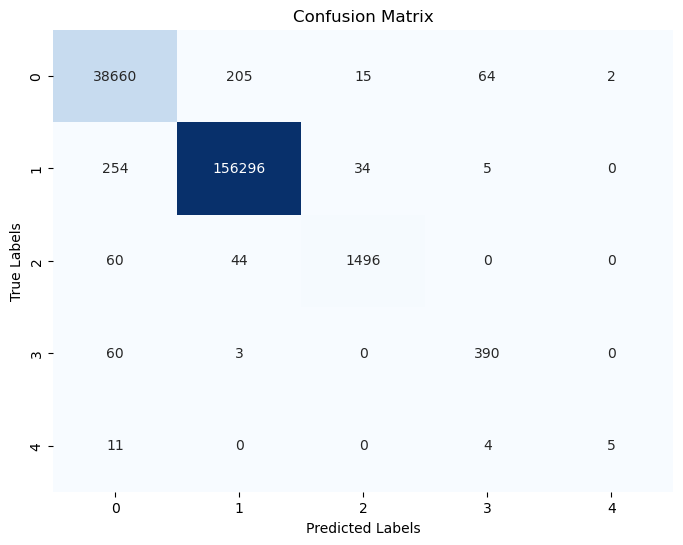

In [145]:
conf_matrix = confusion_matrix(y_kdd_test, y_kdd_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Cross Validation

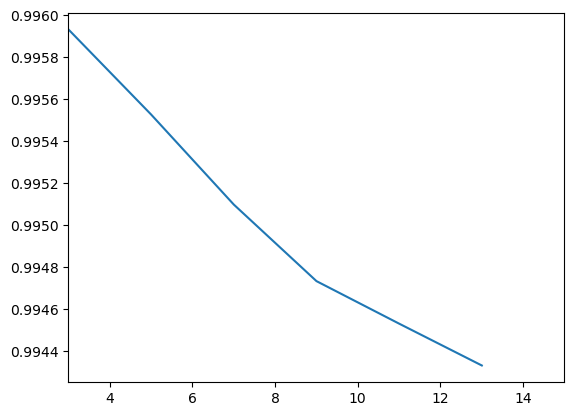

In [146]:
k_list = range(3,15,2)
acc_s = []
for n in k_list:
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn_classifier,x_kdd_train,y_kdd_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(3,15)
x = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(k_list,acc_s)
plt.show()

Therefore, I choose K = 3

## bot_iot

In [59]:
start_time = time.time()
#create model
knn_classifier_bot = KNeighborsClassifier()
#train model
knn_classifier_bot.fit(x_bot_train, y_bot_train)
#predict
y_bot_knn_pred = knn_classifier_bot.predict(x_bot_test)
accuracy_knn_bot = accuracy_score(y_bot_test, y_bot_knn_pred)
end_time = time.time()
elapsed_time = end_time - start_time

In [60]:
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("KNN Model Accuracy on bot_iot：", accuracy_knn_bot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_bot_test, y_bot_knn_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_bot_test, y_bot_knn_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_bot_test, y_bot_knn_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_bot_test, y_bot_knn_pred)*100)

Elapsed Time: 1119.89 seconds
KNN Model Accuracy on bot_iot： 0.9998350835826388
Mean bsolute Error:  0.0002821297387914761
Mean Squared Error:  0.0009417954082362802
Root Mean Squared Error:  0.030688685345519124
R2 Score:  99.97050156799862


## Confusion Matrix

0.0
0
1.0
1
2.0
2
3.0
3
4.0
4
5.0
5
6.0
6
7.0
7
8.0
8
9.0
9
10.0
10


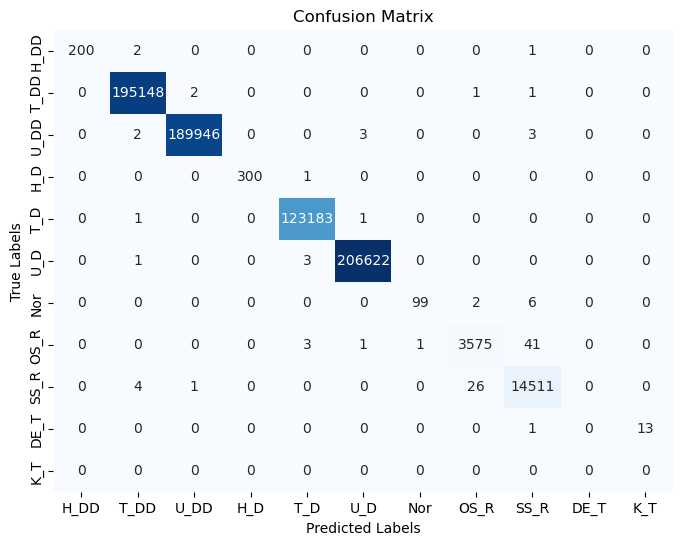

In [14]:
conf_matrix = confusion_matrix(y_bot_test, y_bot_knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['H_DD','T_DD','U_DD','H_D','T_D','U_D','Nor','OS_R','SS_R','DE_T','K_T']
ylabel = np.union1d(np.array(y_bot_test), np.array(y_bot_knn_pred))
labelnames = []
for i in ylabel:
    print(i)
    print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

# not iot

In [61]:
import lightgbm as lgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#create model

start_time = time.time()
lgb_not_model = lgb.LGBMClassifier(
    objective='multiclass',  # 
    num_class=10,   # 
    metric='multi_logloss',   # 
    verbose=-1
)
#train model
lgb_not_model.fit(x_not_iot_train, y_not_iot_train)
#predict
y_not_iot_lgb_pred = lgb_not_model.predict(x_not_iot_test)
accuracy_lgb_not_iot = accuracy_score(y_not_iot_test, y_not_iot_lgb_pred)
end_time = time.time()
elapsed_time = end_time - start_time

In [62]:
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("LGB Model Accuracy on not iot：", accuracy_lgb_not_iot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_not_iot_test, y_not_iot_lgb_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_not_iot_test, y_not_iot_lgb_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_not_iot_test, y_not_iot_lgb_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_not_iot_test, y_not_iot_lgb_pred)*100)

Elapsed Time: 4.31 seconds
LGB Model Accuracy on not iot： 0.8701343315406667
Mean bsolute Error:  0.3921912388353195
Mean Squared Error:  1.7580610770214884
Root Mean Squared Error:  1.325918955676209
R2 Score:  77.53348050043193


# Confusion Matrix

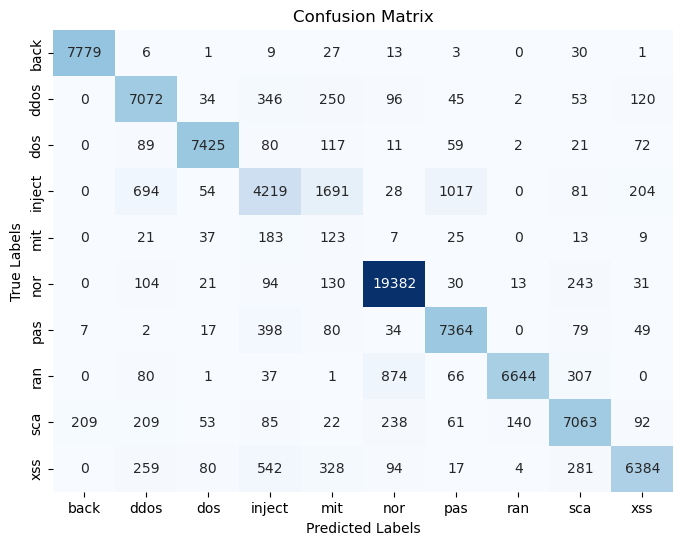

In [14]:
conf_matrix = confusion_matrix(y_not_iot_test, y_not_iot_lgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['back','ddos','dos','inject','mit','nor','pas','ran','sca','xss']
ylabel = np.union1d(np.array(y_not_iot_test), np.array(y_not_iot_lgb_pred))
labelnames = []
for i in ylabel:
#     print(i)
#     print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

# Cross Validation

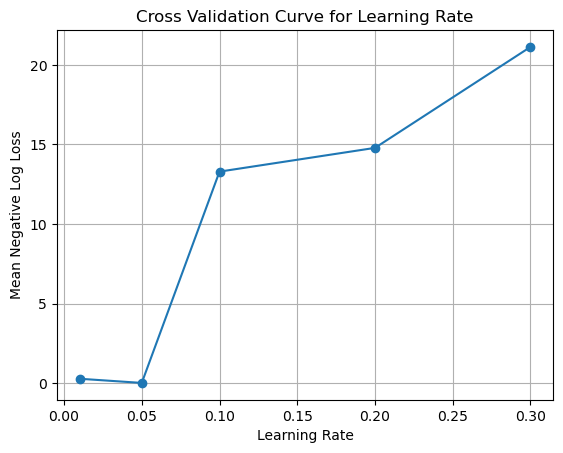

In [8]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

# 
cv_scores = []

# 
for learning_rate in learning_rates:
    # 
    lgb_model = lgb.LGBMClassifier(
        objective='multiclass',
        num_class=10,
        learning_rate=learning_rate,
        verbose=-1
    )

    # 
    scores = cross_val_score(
        lgb_model,
        x_not_iot_train,
        y_not_iot_train,
        cv=5,  # 
        scoring='neg_log_loss'  # 
    )

    # 
    avg_score = -scores.mean()
    cv_scores.append(avg_score)

# 
plt.plot(learning_rates, cv_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Negative Log Loss')
plt.title('Cross Validation Curve for Learning Rate')
plt.grid(True)
plt.show()


# SVM

## UNSW_NB15

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [64]:
# 
start_time = time.time()
#create model
svm_classifier_un = SVC(kernel='linear', random_state=42)
#train model
svm_classifier_un.fit(x_un_train, y_un_train)


#predict
y_un_svm_pred = svm_classifier_un.predict(x_un_test)
accuracy_svm_UN = accuracy_score(y_un_test, y_un_svm_pred)
# 
end_time = time.time()


# 
elapsed_time = end_time - start_time

In [65]:



# 
print(f"Elapsed Time: {elapsed_time:.2f} seconds")

print("SVM Model Accuracy on UNSW_NB15：", accuracy_svm_UN)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_un_test, y_un_svm_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_un_test, y_un_svm_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_un_test, y_un_svm_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_un_test, y_un_svm_pred)*100)

Elapsed Time: 165.49 seconds
SVM Model Accuracy on UNSW_NB15： 0.8846028232391044
Mean bsolute Error:  0.8859092063722466
Mean Squared Error:  6.9703160721413795
Root Mean Squared Error:  2.6401356162404572
R2 Score:  -39.605195102747224


## Confusion Matrix

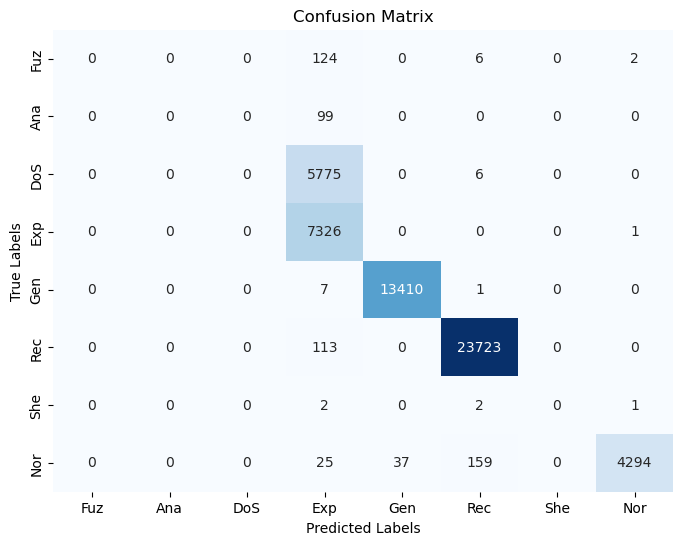

In [153]:
conf_matrix = confusion_matrix(y_un_test, y_un_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
labelnames = ['Fuz','Ana','DoS','Exp','Gen','Rec','She','Nor']
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

## Cross Validation

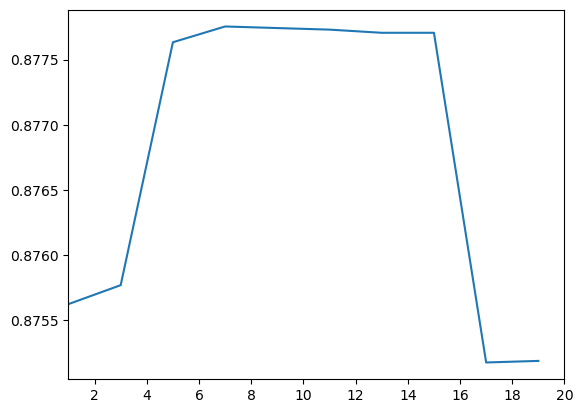

In [155]:
import warnings

warnings.filterwarnings('ignore')
c_list = range(1,20,2)
acc_s = []
for n in c_list:
    svm_classifier = SVC(kernel='linear', random_state=42,C=n,max_iter=1000)
    cv_scores = cross_val_score(svm_classifier,x_un_train,y_un_train,cv=5,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(1,20)
x = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(c_list,acc_s)
plt.show()

## kddcup99

In [11]:
import time
start_time=time.time()
#create model
svm_classifier_kdd = SVC(kernel='linear', random_state=42)
#train model
svm_classifier_kdd.fit(x_kdd_train, y_kdd_train)
#predict
y_kdd_svm_pred = svm_classifier_kdd.predict(x_kdd_test)
accuracy_svm_kdd = accuracy_score(y_kdd_test, y_kdd_svm_pred)
end_time=time.time()
elapsed_time=end_time-start_time

In [14]:
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("SVM Model Accuracy on kddcup99：", accuracy_svm_kdd)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_kdd_test, y_kdd_svm_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_kdd_test, y_kdd_svm_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_kdd_test, y_kdd_svm_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_kdd_test, y_kdd_svm_pred)*100)

Elapsed Time: 426.95 seconds
SVM Model Accuracy on kddcup99： 0.996978867252338
Mean bsolute Error:  0.004994737055179953
Mean Squared Error:  0.010318408161612891
Root Mean Squared Error:  0.10157956566954247
R2 Score:  94.31529743571204


## Confusion Matrix

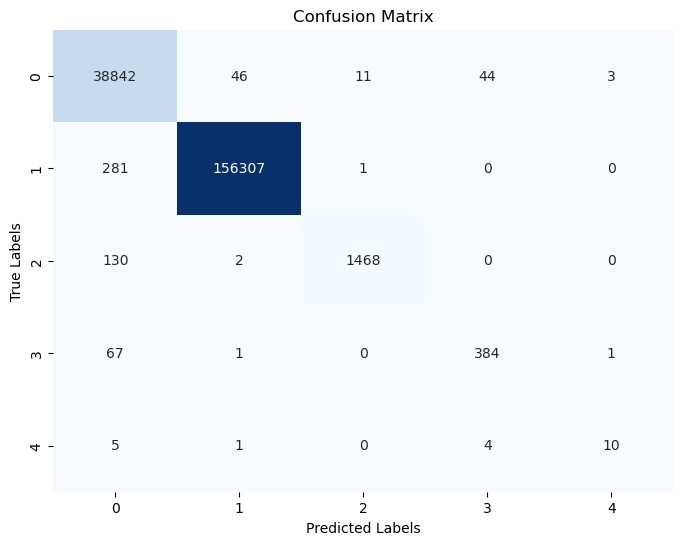

In [17]:
import warnings

warnings.filterwarnings('ignore')
conf_matrix = confusion_matrix(y_kdd_test, y_kdd_svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Cross Validation

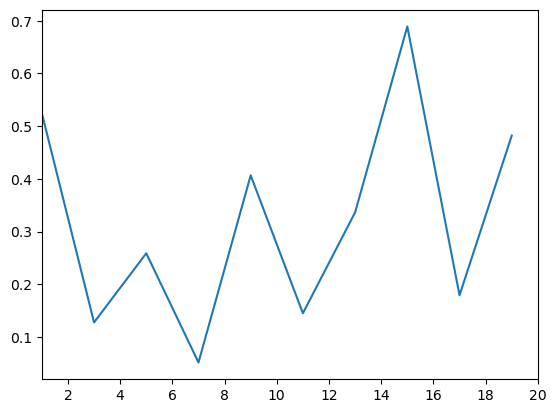

In [166]:

c_list = range(1,20,2)
acc_s = []
for n in c_list:
    svm_classifier = SVC(kernel='linear', random_state=42,C=n,max_iter=1000)
    cv_scores = cross_val_score(svm_classifier,x_kdd_train,y_kdd_train,cv=3,scoring='accuracy')
    acc_s.append(cv_scores.mean())
# plt.ylim(0.88,0.892)
plt.xlim(1,20)
x = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x)
plt.plot(c_list,acc_s)
plt.show()

## bot_iot

# bayes

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [19]:
nb_classifier_not_iot = MultinomialNB(alpha=0.5)
# 
nb_classifier_not_iot.fit(x_not_iot_train, y_not_iot_train)

# 
y_not_iot_bayes_pred = nb_classifier_not_iot.predict(x_not_iot_test)
accuracy_bayes_not_iot = accuracy_score(y_not_iot_test, y_not_iot_bayes_pred)
print("Bayes Model Accuracy on not_iot：", accuracy_bayes_not_iot)

Bayes Model Accuracy on not_iot： 0.3919543225378474


# XGBoost

# bot_iot

In [20]:
import xgboost as xgb

In [21]:
start_time = time.time()
xgb_classifier_bot = xgb.XGBClassifier(objective='multi:softmax', num_class=11)
# 
xgb_classifier_bot.fit(x_bot_train, y_bot_train)

# 
y_bot_xgb_pred = xgb_classifier_bot.predict(x_bot_test)
accuracy_xgb_bot = accuracy_score(y_bot_test, y_bot_xgb_pred)
end_time = time.time()
elapsed_time = end_time - start_time


In [22]:

print(f"Elapsed Time: {elapsed_time:.2f} seconds")

print("XGBoost Model Accuracy on bot：", accuracy_xgb_bot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_bot_test, y_bot_xgb_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_bot_test, y_bot_xgb_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_bot_test, y_bot_xgb_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_bot_test, y_bot_xgb_pred)*100)

Elapsed Time: 69.92 seconds
XGBoost Model Accuracy on bot： 0.9999768299248335
Mean bsolute Error:  2.7258911960529095e-05
Mean Squared Error:  4.361425913684655e-05
Root Mean Squared Error:  0.006604109261425537
R2 Score:  99.99863393870845


# Confusion Matrix

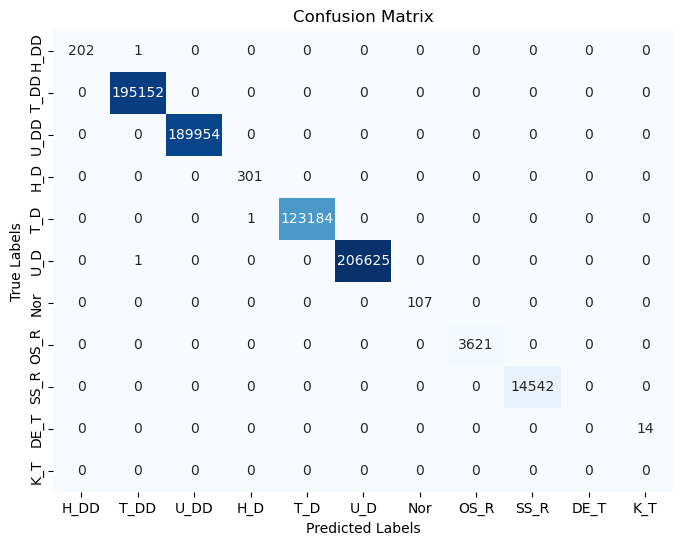

In [23]:
conf_matrix = confusion_matrix(y_bot_test, y_bot_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['H_DD','T_DD','U_DD','H_D','T_D','U_D','Nor','OS_R','SS_R','DE_T','K_T']
ylabel = np.union1d(np.array(y_bot_test), np.array(y_bot_xgb_pred))
labelnames = []
for i in ylabel:
    # print(i)
    # print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

# not iot

In [24]:
start_time = time.time()
xgb_classifier_not_iot = xgb.XGBClassifier(objective='multi:softmax', num_class=10)
# 
xgb_classifier_not_iot.fit(x_not_iot_train, y_not_iot_train)

# 
y_not_iot_xgb_pred = xgb_classifier_not_iot.predict(x_not_iot_test)
accuracy_xgb_not_iot = accuracy_score(y_not_iot_test, y_not_iot_xgb_pred)
end_time = time.time()
elapsed_time = end_time - start_time

In [26]:
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print("XGBoost Model Accuracy on not_iot：", accuracy_xgb_not_iot)
print("Mean bsolute Error: ",metrics.mean_absolute_error(y_not_iot_test, y_not_iot_xgb_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_not_iot_test, y_not_iot_xgb_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_not_iot_test, y_not_iot_xgb_pred)))
print("R2 Score: ",metrics.explained_variance_score(y_not_iot_test, y_not_iot_xgb_pred)*100)

Elapsed Time: 4.79 seconds
XGBoost Model Accuracy on not_iot： 0.990310123433391
Mean bsolute Error:  0.043722902698476625
Mean Squared Error:  0.2467838612618162
Root Mean Squared Error:  0.49677345064105044
R2 Score:  96.83707465639552


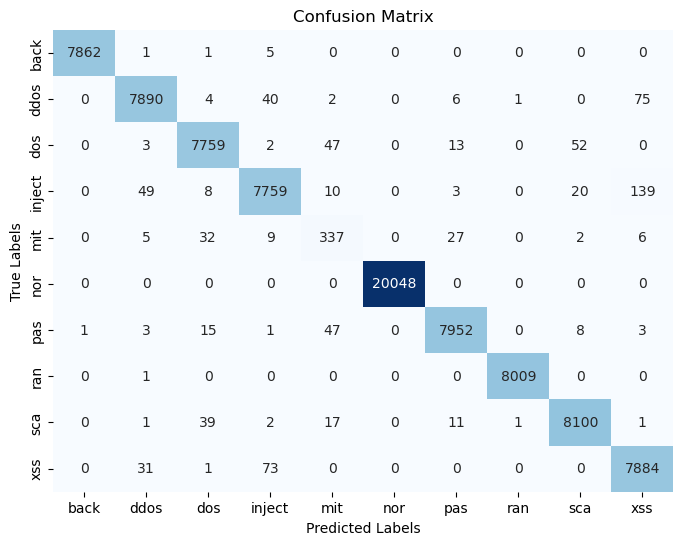

In [17]:
conf_matrix = confusion_matrix(y_not_iot_test, y_not_iot_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
ll = ['back','ddos','dos','inject','mit','nor','pas','ran','sca','xss']
ylabel = np.union1d(np.array(y_not_iot_test), np.array(y_not_iot_xgb_pred))
labelnames = []
for i in ylabel:
#     print(i)
#     print(int(i))
    labelnames.append(ll[int(i)])
plt.xticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.yticks(ticks=[i + 0.5 for i in range(len(labelnames))], labels=labelnames)
plt.show()

# Cross Validation

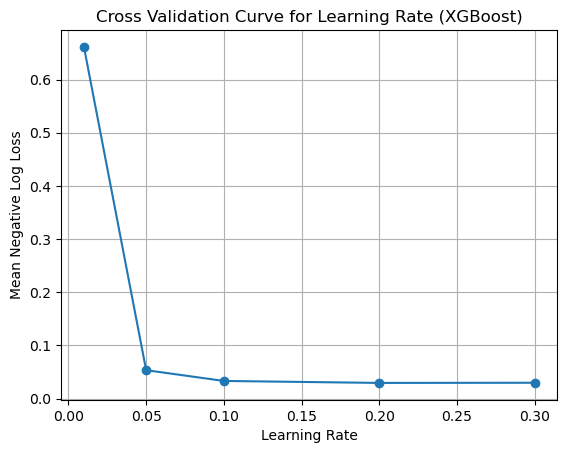

In [19]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]

# 
cv_scores = []

# 
for learning_rate in learning_rates:
    # 
    xgb_model = xgb.XGBClassifier(
        objective='multi:softprob',
        num_class=10,
        learning_rate=learning_rate
    )

    # 
    scores = cross_val_score(
        xgb_model,
        x_not_iot_train,
        y_not_iot_train,
        cv=5,  # 
        scoring='neg_log_loss'  # 
    )

    # 
    avg_score = -scores.mean()
    cv_scores.append(avg_score)

# 
plt.plot(learning_rates, cv_scores, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Negative Log Loss')
plt.title('Cross Validation Curve for Learning Rate (XGBoost)')
plt.grid(True)
plt.show()


# UNSW_NB15 Model Effective

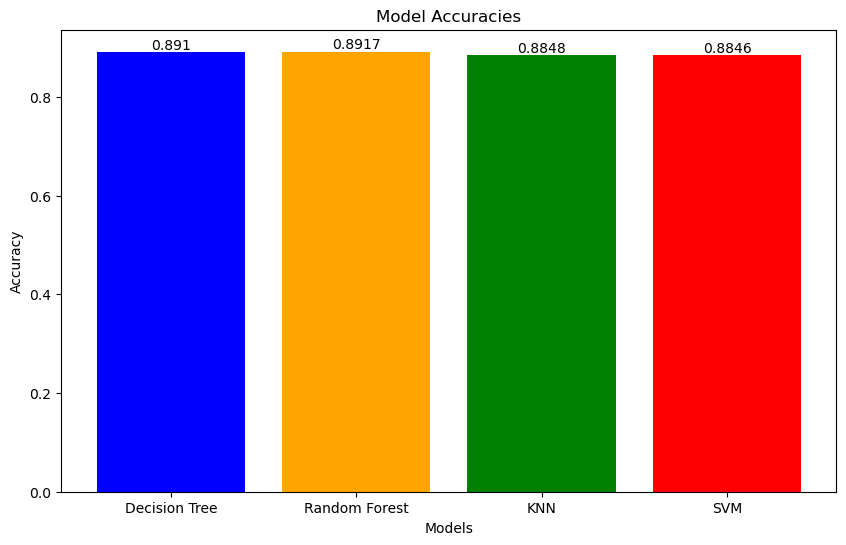

In [164]:
import matplotlib.pyplot as plt

# Accuracy of Models
accuracies = [accuracy_dt_UN, accuracy_rf_UN, accuracy_knn_UN, accuracy_svm_UN]  # 

# Model name
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(accuracy, 4),
             ha='center', va='bottom')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

# kddcup99 Model Effective

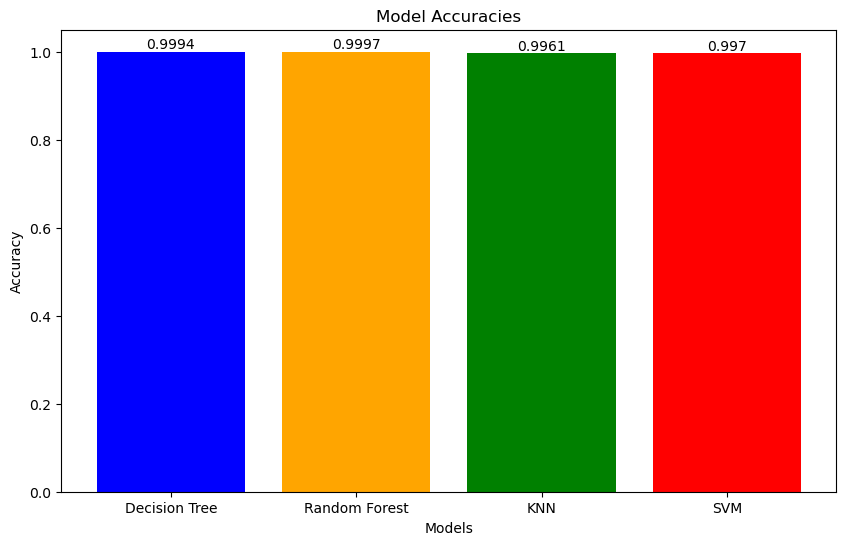

In [165]:
import matplotlib.pyplot as plt

# Accuracy of Models
accuracies = [accuracy_dt_kdd, accuracy_rt_kdd, accuracy_knn_kdd, accuracy_svm_kdd]  # 

# Model name
models = ['Decision Tree', 'Random Forest', 'KNN', 'SVM']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(accuracy, 4),
             ha='center', va='bottom')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

# bot iot Model Effective

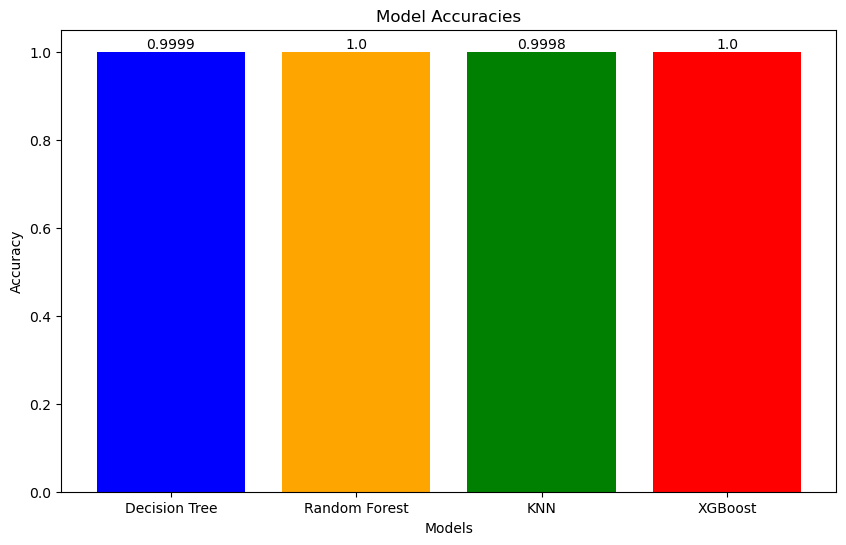

In [21]:
import matplotlib.pyplot as plt

# Accuracy of Models
accuracies = [accuracy_dt_bot, accuracy_rt_bot, accuracy_knn_bot, accuracy_xgb_bot]  # 

# Model name
models = ['Decision Tree', 'Random Forest', 'KNN', 'XGBoost']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(accuracy, 4),
             ha='center', va='bottom')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

# not iot Model Effective

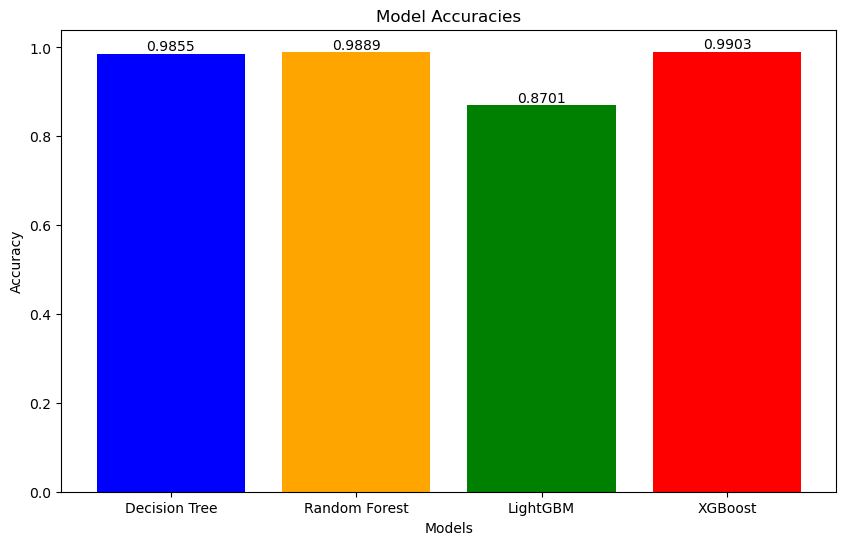

In [23]:
import matplotlib.pyplot as plt

# Accuracy of Models
accuracies = [accuracy_dt_not, accuracy_rt_not_iot, accuracy_lgb_not_iot, accuracy_xgb_not_iot]  # 

# Model name
models = ['Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(accuracy, 4),
             ha='center', va='bottom')
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()